In [1]:
! pip install yfinance


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import datetime
import yfinance as yf


In [3]:
# Define the start and end dates
start = '2010-01-01'
end = '2024-05-16'

# Retrieve the data
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the dataframe
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461976  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473149  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400680  447610800


In [4]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000


In [5]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [7]:
df = df.drop(['Date','Adj Close'] , axis = 1)
df.head(3)

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000


In [8]:
#plt.plot(df.Close)
#plt.show()

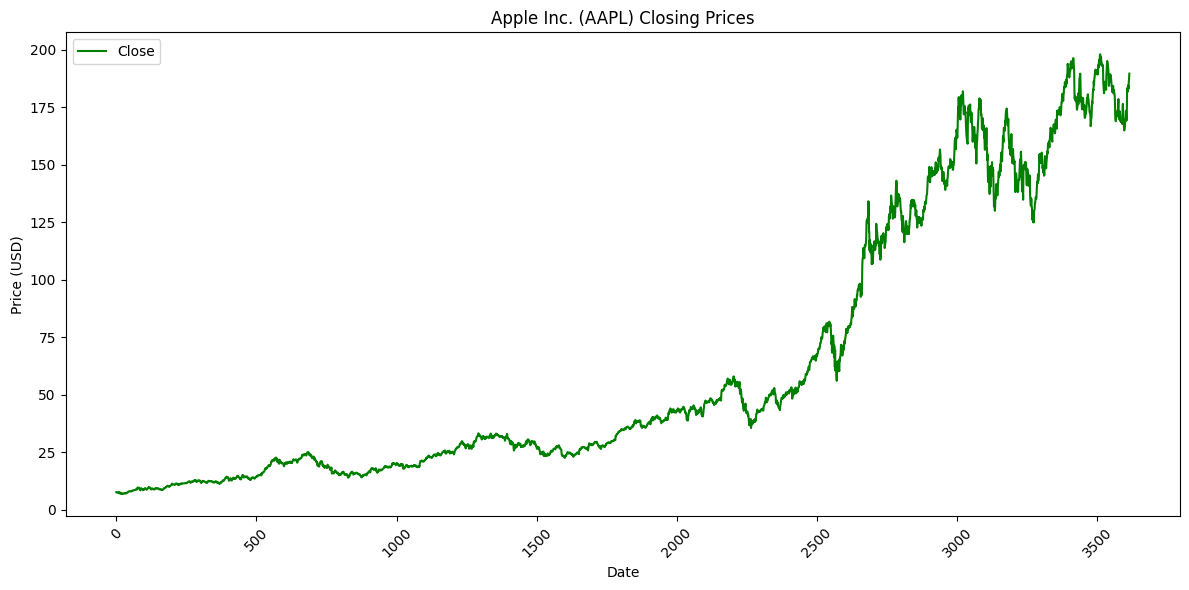

In [9]:

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close', color='green')

# Add labels and title
plt.title('Apple Inc. (AAPL) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add legend
plt.legend()


# Show plot
plt.tight_layout()
plt.show()


In [10]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3611,182.559998,184.660004,182.110001,184.570007,48983000
3612,184.899994,185.089996,182.130005,183.050003,50759500
3613,185.440002,187.100006,184.619995,186.279999,72044800
3614,187.509995,188.300003,186.289993,187.429993,52393600


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3611    180.2590
3612    180.1138
3613    180.0177
3614    179.9226
3615    179.8715
Name: Close, Length: 3616, dtype: float64

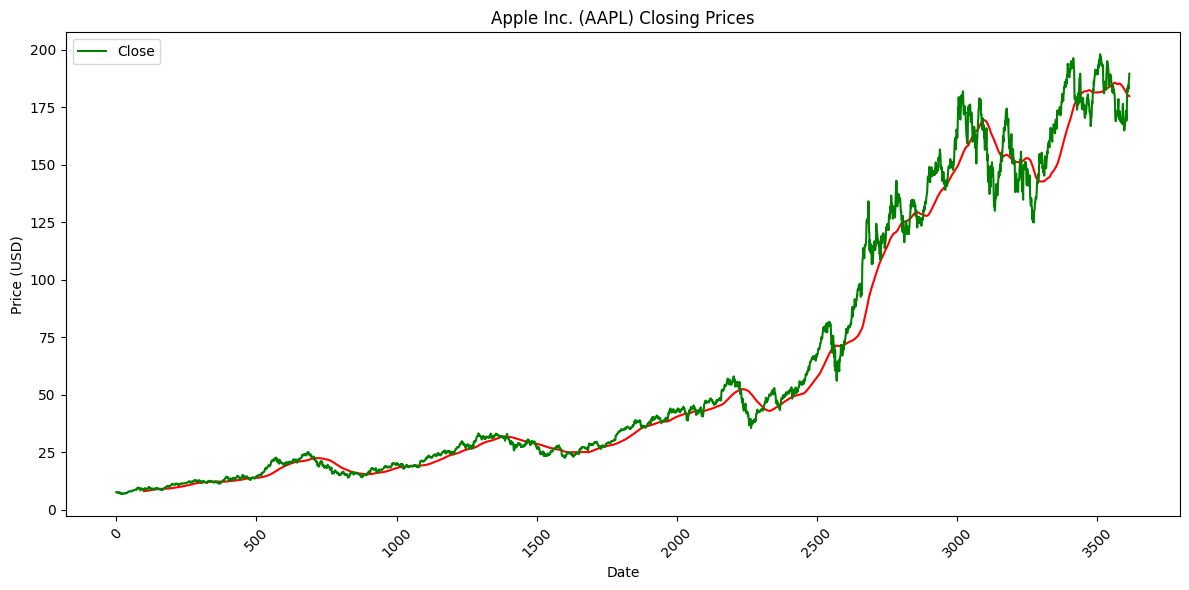

In [12]:

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(ma100, 'r')
plt.plot(df.index, df['Close'], label='Close', color='green')

# Add labels and title
plt.title('Apple Inc. (AAPL) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add legend
plt.legend()


# Show plot
plt.tight_layout()
plt.show()


In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3611    180.98705
3612    180.92980
3613    180.89510
3614    180.85310
3615    180.81945
Name: Close, Length: 3616, dtype: float64

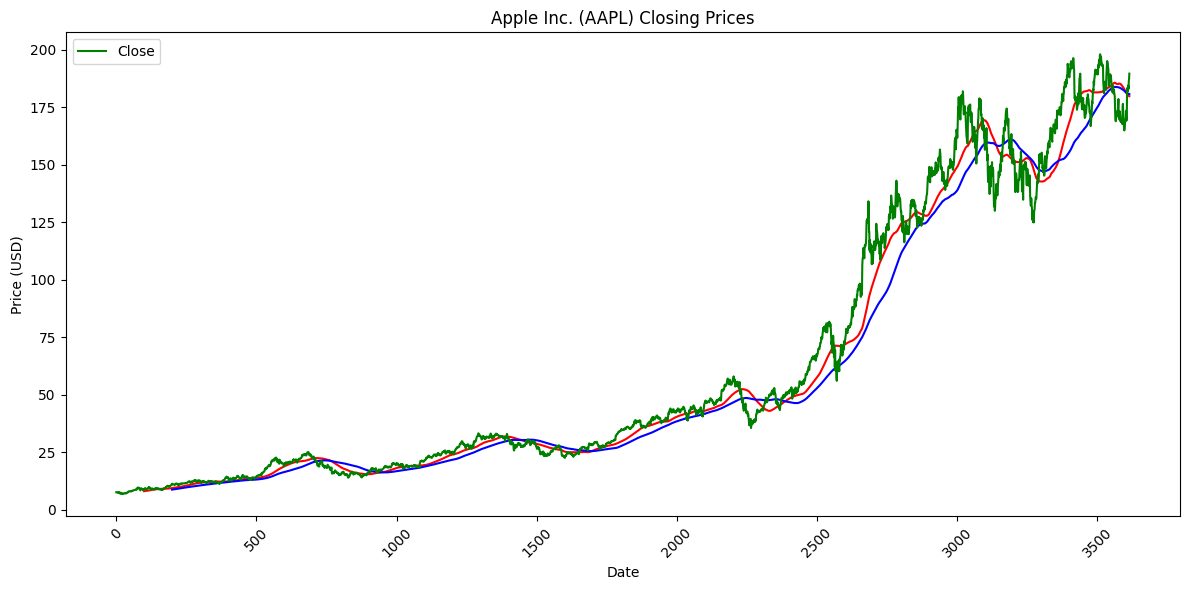

In [14]:

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(ma100, 'r')
plt.plot(ma200, 'b')
plt.plot(df.index, df['Close'], label='Close', color='green')

# Add labels and title
plt.title('Apple Inc. (AAPL) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add legend
plt.legend()


# Show plot
plt.tight_layout()
plt.show()


In [15]:
df.shape

(3616, 5)

In [16]:
# Splitting data into trainin and testin

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2531, 1)
(1085, 1)


In [17]:
data_training.head(3)

,Close
0,7.643214
1,7.656429
2,7.534643


In [18]:
data_testing.head(3)

,Close
2531,79.577499
2532,77.237503
2533,79.422501


## **Scaling** **data**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0107512 ],
       [0.01093235],
       [0.00926288],
       ...,
       [0.99088398],
       [0.99475658],
       [1.        ]])

In [21]:
X_train= []
Y_train = []

for i in range(100 , data_training_array.shape[0]):
     X_train.append(data_training_array[i-100:i])
     Y_train.append(data_training_array[i,0])
X_train

Output hidden; open in https://colab.research.google.com to view.

In [22]:
X_train , Y_train = np.array(X_train), np.array(Y_train)

In [23]:
X_train.shape

(2431, 100, 1)

In [24]:
# ML Model

In [25]:
from keras.layers import Dense , Dropout, LSTM

In [26]:
from keras.models import Sequential

In [27]:
model= Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [31]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
76/76 [==============================] - 24s 310ms/step - loss: 0.0026
Epoch 2/10
76/76 [==============================] - 25s 322ms/step - loss: 0.0025
Epoch 3/10
76/76 [==============================] - 24s 316ms/step - loss: 0.0029
Epoch 4/10
76/76 [==============================] - 25s 325ms/step - loss: 0.0025
Epoch 5/10
76/76 [==============================] - 22s 289ms/step - loss: 0.0020
Epoch 6/10
76/76 [==============================] - 25s 326ms/step - loss: 0.0022
Epoch 7/10
76/76 [==============================] - 22s 286ms/step - loss: 0.0022
Epoch 8/10
76/76 [==============================] - 26s 344ms/step - loss: 0.0021
Epoch 9/10
76/76 [==============================] - 23s 301ms/step - loss: 0.0017
Epoch 10/10
76/76 [==============================] - 30s 394ms/step - loss: 0.0017


In [32]:
model.save('LSTM_Stock_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
data_testing.head()

,Close
2531,79.577499
2532,77.237503
2533,79.422501
2534,81.084999
2535,80.967499


In [34]:
data_training.tail(100)

,Close
2431,52.185001
2432,51.424999
2433,52.297501
2434,53.320000
2435,53.314999
...,...
2526,78.809998
2527,79.682503
2528,79.142502
2529,79.425003


In [35]:
past_100_days = data_training.tail(100)


In [36]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [37]:
final_df.head()

,Close
0,52.185001
1,51.424999
2,52.297501
3,53.320000
4,53.314999


In [38]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.00518119],
       [0.        ],
       [0.00594813],
       ...,
       [0.91935098],
       [0.92719087],
       [0.94280261]])

In [39]:
input_data.shape

(1185, 1)

In [40]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [41]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1085, 100, 1)
(1085,)


In [42]:
# Making predictions
y_predicted = model.predict(x_test)

34/34 [==============================] - 3s 81ms/step


In [43]:
y_predicted.shape

(1085, 1)

In [44]:
y_test

array([0.19192487, 0.17597235, 0.19086819, ..., 0.91935098, 0.92719087,
       0.94280261])

In [45]:
y_predicted

array([[0.1590926],
       [0.1625577],
       [0.1659195],
       ...,
       [0.8164005],
       [0.8253023],
       [0.8348269]], dtype=float32)

In [46]:
scaler.scale_

array([0.00681733])

In [47]:
scale_factor= 1/0.00681733
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


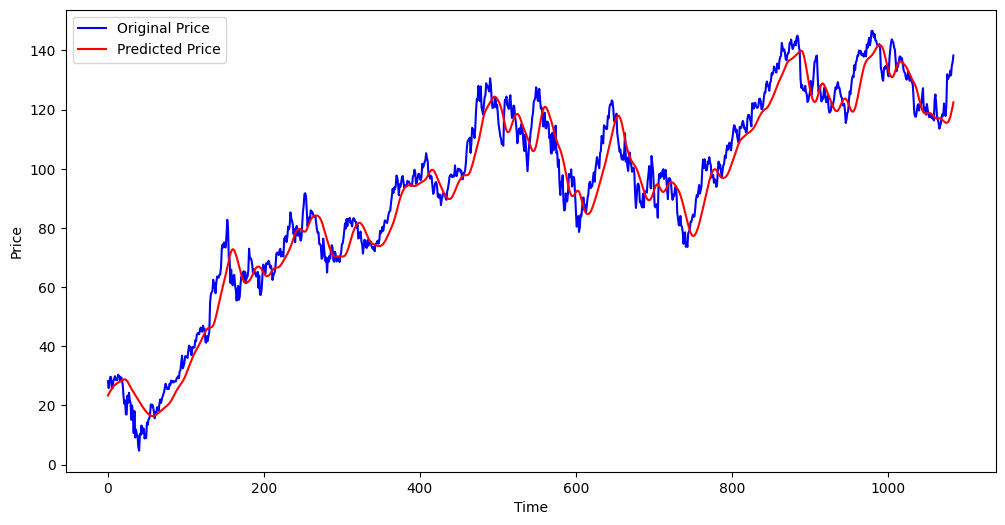

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()